## 라이브러리, 데이터 불러오기

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

In [101]:
df_train = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/test.csv')
df_train.head()
df_test.head()

<ipython-input-101-521dc3cdf84e>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [102]:
# Check Data Size
print('Train Data Size : ',df_train.shape)
print('Test Data Size : ',df_test.shape)

Train Data Size :  (100000, 28)
Test Data Size :  (50000, 27)


In [103]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [104]:
# Check Train dataset
# 데이터 세트에 누락된 값이 있습니다.
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [105]:
# 숫자 데이터 유형이 있는 필드의 통계 값 확인
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [106]:
# 숫자 데이터 유형 이외의 필드에 대한 통계 값 확인
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


## 함수정리

#### 컬럼 정보

In [107]:
# 컬럼에 대한 널값,숫자 유니크, 분포
def get_column_details(df,column):
    print("Details of",column,"column")

    # 데이터 타입
    print("\nDataType: ",df[column].dtype)

    # 널 값 존재하는지 확인 여부
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    # 고유값 개수 확인
    print("\nNumber of Unique Values: ",df[column].nunique())

    # 컬럼 분포 확인
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

### 범주형 변수 clean
### garbage_value = replace_value

In [108]:
def clean_categorical_field(df, column, replace_value=None):

    # gabage => nan 값 처리 해주기.
    if replace_value!=None:
        df[column] = df[column].replace(replace_value, np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")
    return df

### no

In [109]:
def replace_nm_no(df, column):
  # replace NM => No
  df[column] = df[column].replace('NM', 'No')

  return df

### nan 채우는 함수

#### 그룹별 최빈값 함수
#### occupation, payment behavior

In [110]:
# na 값 그룹의 최빈값으로 채우기 => occupation, payment behavior
def fill_missing_with_group_mode(df, groupby, column):
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())

    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0])
    df[column] = df[column].fillna(mode_per_group)

    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())

    return df

#### 그룹별 중앙값
#### Monthly Inhand Salary(왜도설명)
#### Credit History Age (평균도 해보기)
#### Amount Invested Monthly
#### Monthly Balance
#### Num_of_Delayed_Payment
#### Num_Credit_Inquiries  

In [111]:
# na 값 그룹의 중앙값으로 채우기
def fill_missing_with_group_median(df, groupby, column):
    print("\nNo. of missing values before filling with group median:",df[column].isnull().sum())

    # 그룹별 중앙값 구해서 na 중앙값 채우기
    median_per_group = df.groupby(groupby)[column].transform(lambda x: x.median())
    df[column] = df[column].fillna(median_per_group)

    print("\nNo. of missing values after filling with group median:",df[column].isnull().sum())

    return df

#### 그룹별 평균
#### Credit History Age (평균도 해보기)
#### Amount Invested Monthly
#### Monthly Balance
#### Num_of_Delayed_Payment
#### Num_Credit_Inquiries  

In [112]:
# na 값 그룹의 평균으로 채우기
def fill_missing_with_group_mean(df, groupby, column):
    print("\nNo. of missing values before filling with group mean:",df[column].isnull().sum())

    # 그룹별 중앙값 구해서 na 중앙값 채우기
    mean_per_group = df.groupby(groupby)[column].transform(lambda x: x.mean())
    df[column] = df[column].fillna(mean_per_group)

    print("\nNo. of missing values after filling with group mean:",df[column].isnull().sum())

    return df

### 그래프 그리기

#### _stacked_bar

In [113]:
# column1 = 현재 열, column2 = 비교열
def plot_stacked_bar(df,column1,column2, rotation=0):

    print(f'\n{column1} & {column2} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    # bar 그려주기
    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)

    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

#### countplot

In [114]:
def plot_countplot(df, column, rotation=0):

    print(f'\n{column} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.countplot(data=df, x=column)

    plt.xlabel(f'{column}')
    plt.ylabel('Number of Records')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

#### discount plot

In [115]:
def plot_displot(df, column, rotation=0, bins=20):
    print(f'\n{column} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{column}')
    plt.ylabel('Number of Records')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

### 숫자형 변수 clean

In [116]:
def clean_numerical_field(df, column, strip=None, datatype=None, replace_value=None):

    # garbage => nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    # 숫자 옆 특수문자 지우기
    # 각 요소에서 지정된 문자의 선행 및 후행 항목을 제거 => strip
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\n{strip} are removed")

    # 데이터 타입 변경
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    return df


### iqr

#### iqr_drop =  outlier_iqr_drop

In [117]:
def outlier_iqr_drop(df, groupby, column):
    df_iqr = df.copy()

    mode_by_group = df_iqr.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else x.median())
    df_iqr[column] = df_iqr[column].fillna(mode_by_group)
    print(mode_by_group)


    q25, q75 = np.percentile(df_iqr[column], 25), np.percentile(df_iqr[column], 75)
    print('q25' , q25, 'q75', q75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print(lower, upper)

    df[column] = df[column].apply(lambda x: np.nan if ((x < lower) | (x > upper)) else x)
    print(df[column].value_counts(dropna=False))

    # drop
    df.dropna(subset=[column], inplace=True)
    print(df[column].value_counts(dropna=False))

    return df

#### iqr 대체 = outlier_iqr_fill

In [118]:
def outlier_iqr_fill(df, groupby, column):
    df_iqr = df.copy()

    mode_by_group = df_iqr.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    df_iqr[column].fillna(mode_by_group, inplace=True)


    q25, q75 = np.percentile(df_iqr[column], 25), np.percentile(df_iqr[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    df[column] = df[column].apply(lambda x: upper if (x > upper) else x)
    df[column] = df[column].apply(lambda x: lower if (x < lower) else x)

    # drop

    return df

### 음수값 처리 함수

In [119]:
def remove_negatives(df, column):

    #if df[column].dtypes == object:
        # 숫자형으로 바꾸기 + 언더바 없애기(_)
     #   df[column] = pd.to_numeric(df[column].str.replace('_', ''))

    # negative값의 개수
    count_negative = np.sum(df[column] < 0)
    print("\n-----------------------------------------------------")
    print("\nThere are ",count_negative," negative values(Before)")

    # 음수값 제거 -> 0보다 큰 값만 사용
    df = df[df[column] >= 0]

    count_negative = np.sum(df[column] < 0)
    print("\n-----------------------------------------------------")
    print("\nThere are ",count_negative," negative values(After)")

    return df

### month_Converter

In [120]:
def Month_Converter(df, column):

    def Sub_Month_Converter(val):
        if pd.notnull(val):
            years = int(val.split(' ')[0])
            month = int(val.split(' ')[3])
            return (years*12)+month
        else:
            return val

    df[column] = df[column].apply(lambda x: Sub_Month_Converter(x)).astype(float)

    return df

In [121]:
## 복사본
df_clean = df_train.copy()

## Categorical Variables

### credit score
#### 표준 - 53% 나쁨 - 29% 좋음 - 17%

#### 신용 점수에는 null 값이 없습니다

Details of Credit_Score column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

Credit_Score Distribution


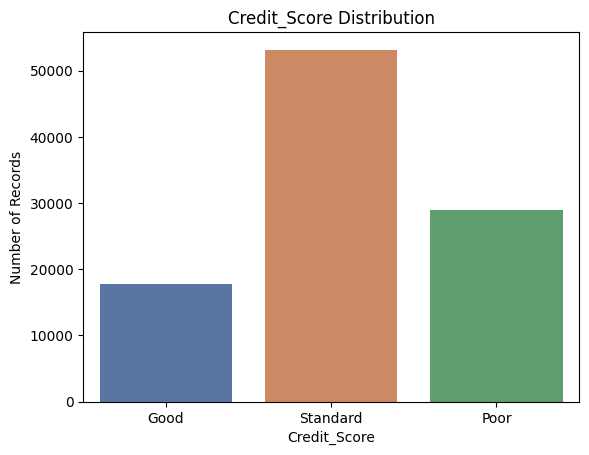

In [122]:
column_name = 'Credit_Score'

# 칼럼 정보
get_column_details(df_clean,column_name)

# 빈도그래프
plot_countplot(df_clean, column_name)

### customer_id

In [123]:
get_column_details(df_clean,'Customer_ID')

Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  12500

Distribution of column:

CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64


In [124]:
# 동일한 고객이 다른 신용 점수를 가질 수 있는지 확인
df_clean.groupby(['Customer_ID'])['Credit_Score'].nunique()

Customer_ID
CUS_0x1000    2
CUS_0x1009    1
CUS_0x100b    2
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     2
CUS_0xff4     1
CUS_0xff6     2
CUS_0xffc     2
CUS_0xffd     2
Name: Credit_Score, Length: 12500, dtype: int64

### month

Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

Month & Credit_Score Distribution


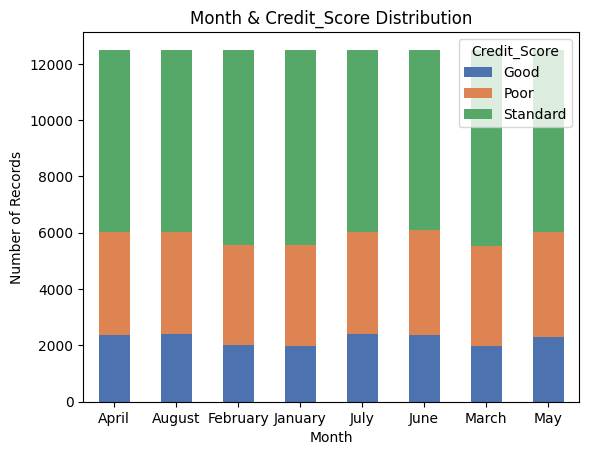

In [125]:
column_name = 'Month'

# 칼럼 정보
get_column_details(df_clean,column_name)

# plot
plot_stacked_bar(df_clean,column_name,'Credit_Score')

In [126]:
# 월을 datetime 객체로 변환(1~8) , 데이터 타입 변환
df_clean['Month'] = pd.to_datetime(df_clean.Month, format='%B').dt.month
df_clean['Month']

0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 100000, dtype: int64

In [127]:
df_clean

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


### occupation
### garbage_value = '_______' => nan
### nan => 그룹화 최빈값

Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 7062

No. of missing values after filling with group mode: 0

Occupation & Credit_Score Distribution


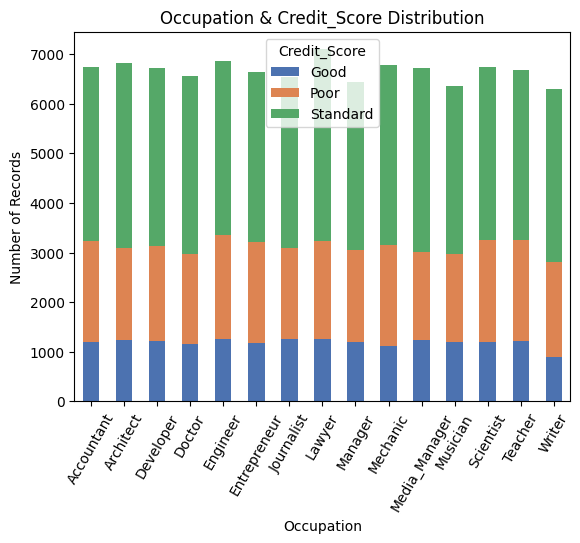

In [128]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'

get_column_details(df_clean,column_name)

# garbage_value => nan 처리 해줌
df_clean = clean_categorical_field(df_clean, column_name, garbage_value)

# nan 값 그룹화 최빈값 처리
df_clean = fill_missing_with_group_mode(df_clean, group_by, column_name)

# plot
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

In [129]:
df_clean

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


### credit mix _ drop

Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

Garbage value _ is replaced with np.nan

Credit_Mix & Credit_Score Distribution


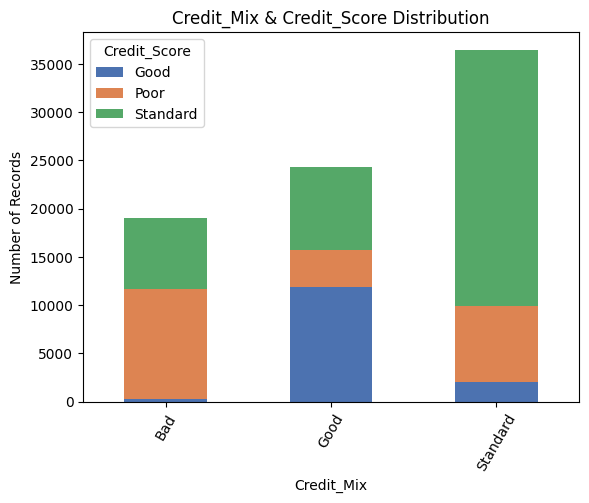

In [130]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_categorical_field(df_clean,column_name,garbage_value)

df_clean.dropna(subset=['Credit_Mix'], inplace=True)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

### Payment_of_Min_Amount NO

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Yes    41678
No     28524
NM      9603
Name: Payment_of_Min_Amount, dtype: int64

Payment_of_Min_Amount & Credit_Score Distribution


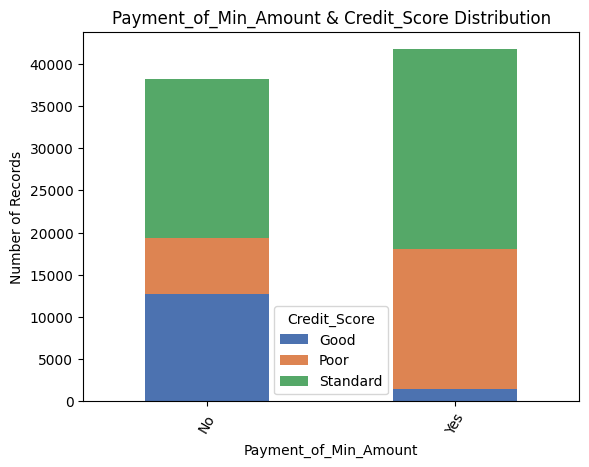

In [131]:
column_name = 'Payment_of_Min_Amount'

# Get Details
get_column_details(df_clean,column_name)

# Replace NM => No
df_clean = replace_nm_no(df_clean, column_name)

# Plot
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

### Payment Behaviour
### garbage => nan
### customer_id 최빈값


Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 6096

No. of missing values after filling with group mode: 0

Payment_Behaviour & Credit_Score Distribution


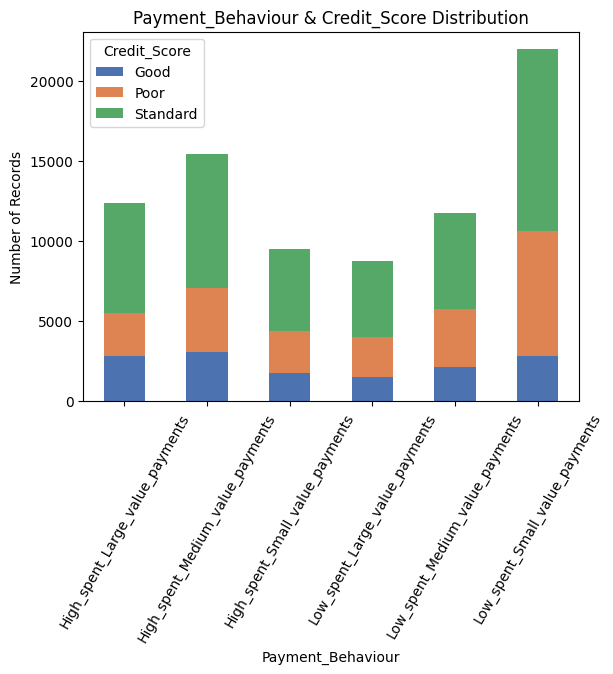

In [132]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

clean_categorical_field(df_clean, column_name, garbage_value)

# nan 값 그룹화 최빈값 처리
df_clean = fill_missing_with_group_mode(df_clean, group_by, column_name)

# plot
plot_stacked_bar(df_clean,column_name,'Credit_Score',rotation=60)

## Numerical Variables
### 후행 및 선행 특수 문자를 제거합니다.
### 필요한 경우 데이터 유형을 객체에서 int/float로 변환합니다.
### Customer_ID로 그룹화할 때 null 값 및 이상값을 모드 값으로 대체

### age
### 1) _ 제거
### 2) iqr
### 3) 음수 확인

Details of Age column

DataType:  object

There are no null values

Number of Unique Values:  1460

Distribution of column:

38      2264
28      2257
31      2226
26      2193
25      2183
        ... 
7549       1
3119       1
4194       1
2212       1
2263       1
Name: Age, Length: 1460, dtype: int64

_ are removed

Datatype of Age is changed to <class 'int'>

Age Distribution


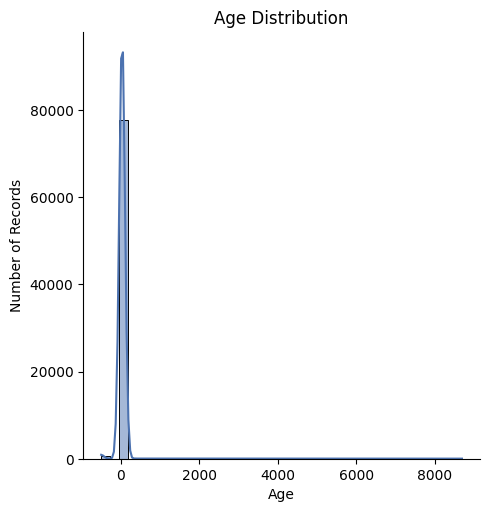

1        23
2        23
3        23
4        23
5        23
         ..
99991    28
99993    25
99997    25
99998    25
99999    25
Name: Age, Length: 79805, dtype: int64
q25 24.0 q75 42.0
-3.0 69.0
38.0    2405
28.0    2363
31.0    2346
26.0    2314
35.0    2309
25.0    2286
44.0    2286
36.0    2281
32.0    2272
41.0    2269
39.0    2260
27.0    2259
34.0    2257
19.0    2246
NaN     2217
43.0    2208
37.0    2205
22.0    2201
20.0    2189
21.0    2181
30.0    2174
29.0    2166
24.0    2142
45.0    2111
23.0    2100
40.0    2075
42.0    2061
33.0    2025
18.0    1962
46.0    1304
15.0    1278
17.0    1201
16.0    1165
49.0    1098
55.0    1097
48.0    1078
53.0    1058
52.0    1054
54.0    1043
51.0    1027
50.0    1011
47.0     995
14.0     944
56.0     282
Name: Age, dtype: int64
38.0    2405
28.0    2363
31.0    2346
26.0    2314
35.0    2309
25.0    2286
44.0    2286
36.0    2281
32.0    2272
41.0    2269
39.0    2260
27.0    2259
34.0    2257
19.0    2246
43.0    2208
37.0    22

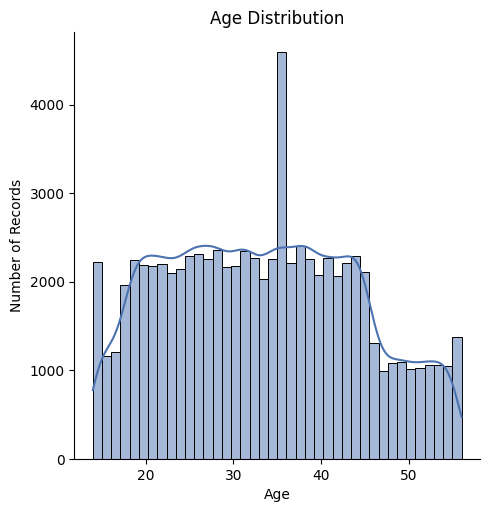

In [133]:
column_name = 'Age'
group_by = 'Customer_ID'

get_column_details(df_clean, column_name)

# clean
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype=int)

# plot
plot_displot(df_clean,column_name,bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)
#outlier_iqr_fill(df_train, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)

# plot
plot_displot(df_clean,column_name,bins=40)

In [134]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good


### Annual Income
#### _ 제거
### iqr

In [135]:
df_clean.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         7752
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11640
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 8737
Delay_from_due_date             0
Num_of_Delayed_Payment       5469
Changed_Credit_Limit            0
Num_Credit_Inquiries         1521
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7015
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3505
Payment_Behaviour               0
Monthly_Balance               945
Credit_Score                    0
dtype: int64

Details of Annual_Income column

DataType:  object

There are no null values

Number of Unique Values:  17786

Distribution of column:

17273.83     14
95596.35     14
17816.75     14
32543.38     13
36585.12     13
             ..
63876.28_     1
18295.61_     1
97505.64_     1
34620.62_     1
83408.52_     1
Name: Annual_Income, Length: 17786, dtype: int64

_ are removed

Datatype of Annual_Income is changed to <class 'float'>

Annual_Income Distribution


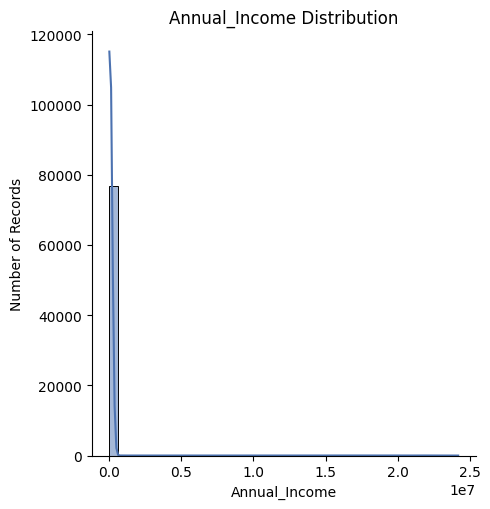

1        19114.12
3        19114.12
4        19114.12
5        19114.12
6        19114.12
           ...   
99991    20002.88
99993    39628.99
99997    39628.99
99998    39628.99
99999    39628.99
Name: Annual_Income, Length: 77588, dtype: float64
q25 19506.72 q75 73083.44
-60858.36 153448.52000000002
NaN           2140
17816.750       15
32543.380       15
95596.350       14
17273.830       14
              ... 
8961.865         2
19922.110        1
34413.760        1
108064.480       1
19296.415        1
Name: Annual_Income, Length: 12268, dtype: int64
32543.380     15
17816.750     15
17273.830     14
95596.350     14
22434.160     14
              ..
8961.865       2
19922.110      1
34413.760      1
108064.480     1
19296.415      1
Name: Annual_Income, Length: 12267, dtype: int64

Annual_Income Distribution


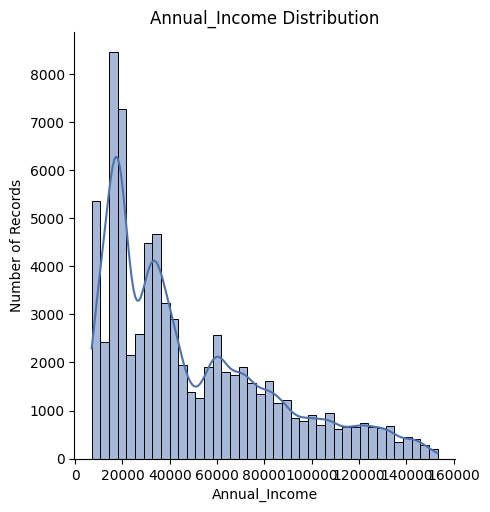

In [136]:
column_name = 'Annual_Income'
group_by = 'Customer_ID'

get_column_details(df_clean,column_name)

# Clean
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype=float)

plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [137]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good


In [138]:
df_clean.shape

(75448, 28)

### Monthly Inhand Salary
#### null 값이 있습니다.
#### 월 소득 급여에 대한 이상치는 없었습니다.
#### 대부분의 고객은 월 소득이 낮습니다. 분포가 오른쪽으로 치우쳐 있습니다.

Details of Monthly_Inhand_Salary column

DataType:  float64

There are  11303  null values

Number of Unique Values:  12937

Distribution of column:

6769.130000    14
5766.491667    11
3080.555000    11
6358.956667    11
6082.187500    10
               ..
6384.858899     1
2397.951667     1
817.769538      1
2756.856952     1
6788.980000     1
Name: Monthly_Inhand_Salary, Length: 12937, dtype: int64

Monthly_Inhand_Salary Distribution


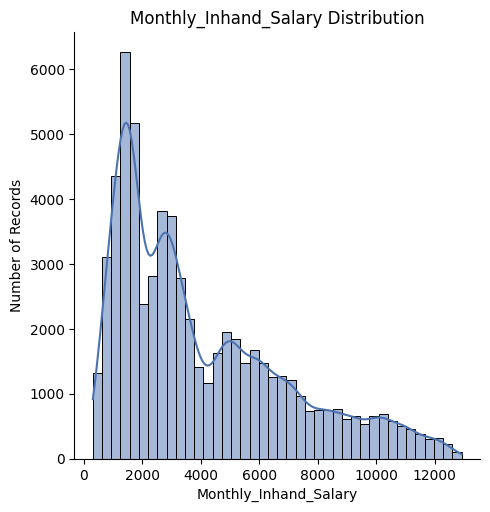


No. of missing values before filling with group median: 11303


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



No. of missing values after filling with group median: 7


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


1        1824.843333
3        1824.843333
4        1824.843333
5        1824.843333
6        1824.843333
            ...     
99991    1929.906667
99993    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 75448, dtype: float64
q25 nan q75 nan
nan nan
6769.130000     15
1315.560833     14
5766.491667     14
536.431250      13
3080.555000     13
                ..
4183.908010      1
3916.657500      1
1653.776976      1
10015.673333     1
1767.273333      1
Name: Monthly_Inhand_Salary, Length: 13012, dtype: int64
6769.130000     15
1315.560833     14
5766.491667     14
536.431250      13
3080.555000     13
                ..
4183.908010      1
3916.657500      1
1653.776976      1
10015.673333     1
1767.273333      1
Name: Monthly_Inhand_Salary, Length: 13011, dtype: int64

Monthly_Inhand_Salary Distribution


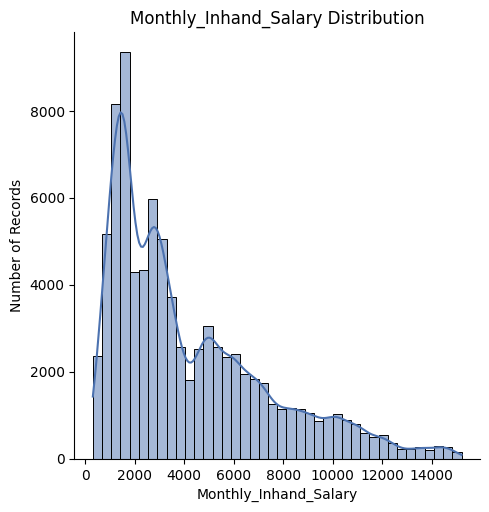

In [139]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

plot_displot(df_clean, column_name, bins=40)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_train, column_name, bins=40)

In [140]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good


In [141]:
df_clean.shape

(75441, 28)

### Num Bank Accounts
#### 일부 이상치, 음수 값이 있습니다.
#### 정리 후 이 필드에는 11개의 가능한 값이 있습니다. Num Bank Accounts 범위는 0에서 10입니다.
#### 대부분의 고객은 그렇지 않습니다. 3에서 8 사이의 은행 계좌

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  760

Distribution of column:

6       9992
7       9878
8       9776
4       9108
3       9044
        ... 
540        1
1662       1
583        1
1695       1
697        1
Name: Num_Bank_Accounts, Length: 760, dtype: int64

Num_Bank_Accounts Distribution


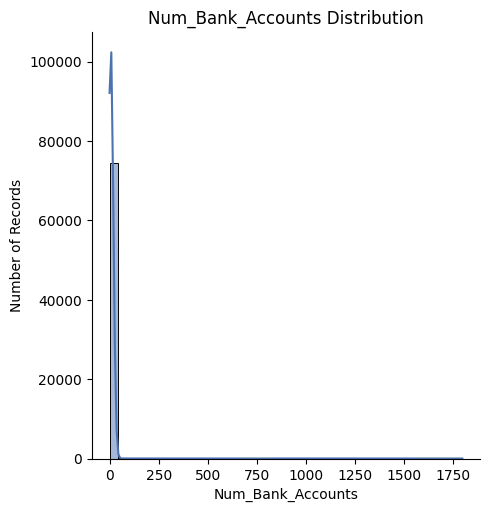

1         3
3         3
4         3
5         3
6         3
         ..
99991    10
99993     4
99997     4
99998     4
99999     4
Name: Num_Bank_Accounts, Length: 75441, dtype: int64
q25 4.0 q75 8.0
-2.0 14.0
 6.0     9992
 7.0     9878
 8.0     9776
 4.0     9108
 3.0     9044
 5.0     9031
 9.0     4183
 10.0    4024
 1.0     3225
 0.0     3182
 2.0     2990
 NaN      983
-1.0       18
 11.0       7
Name: Num_Bank_Accounts, dtype: int64
 6.0     9992
 7.0     9878
 8.0     9776
 4.0     9108
 3.0     9044
 5.0     9031
 9.0     4183
 10.0    4024
 1.0     3225
 0.0     3182
 2.0     2990
-1.0       18
 11.0       7
Name: Num_Bank_Accounts, dtype: int64

-----------------------------------------------------

There are  18  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)

Num_Bank_Accounts Distribution


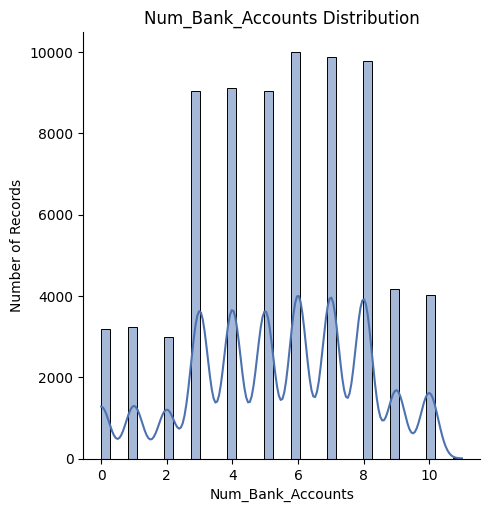

In [142]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean, column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [143]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good


In [144]:
df_clean.shape

(74440, 28)

### Num Credit Cards
#### 신용 카드 번호의 고유 값이 1179개이므로 필드에 이상값이 있습니다.
#### 이상값을 제거한 후 신용 카드 수는 0에서 11까지이며 대부분의 고객은 3에서 7 범위의 신용 카드를 가지고 있으며 피크는 5입니다.

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  1022

Distribution of column:

5       13757
7       12470
6       12362
4       10385
3        9667
        ...  
854         1
655         1
1051        1
1450        1
1430        1
Name: Num_Credit_Card, Length: 1022, dtype: int64

Num_Credit_Card Distribution


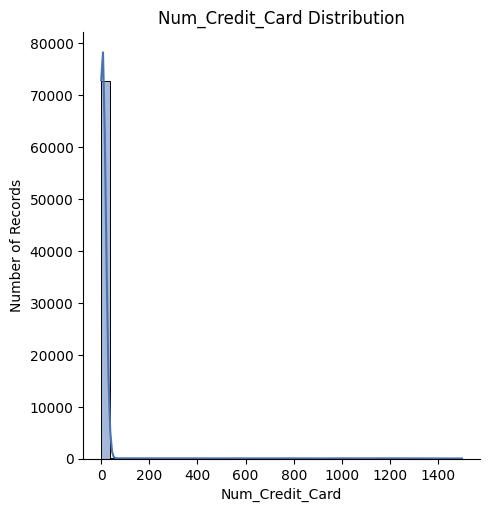

1        4
3        4
4        4
5        4
6        4
        ..
99991    8
99993    6
99997    6
99998    6
99999    6
Name: Num_Credit_Card, Length: 74440, dtype: int64
q25 4.0 q75 7.0
-0.5 11.5
5.0     13757
7.0     12470
6.0     12362
4.0     10385
3.0      9667
10.0     3736
8.0      3728
9.0      3520
NaN      1690
2.0      1568
1.0      1519
11.0       28
0.0        10
Name: Num_Credit_Card, dtype: int64
5.0     13757
7.0     12470
6.0     12362
4.0     10385
3.0      9667
10.0     3736
8.0      3728
9.0      3520
2.0      1568
1.0      1519
11.0       28
0.0        10
Name: Num_Credit_Card, dtype: int64

Num_Credit_Card Distribution


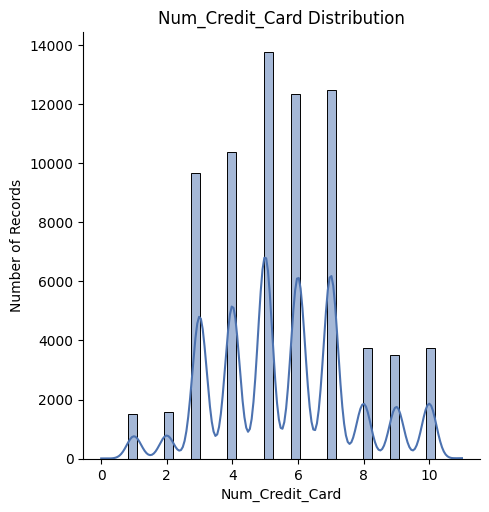

In [145]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [146]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good


In [147]:
df_clean.shape

(72750, 28)

### Interest Rate
#### 특이치 존재, 정리 후 금리 범위 1% ~ 34%

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  1370

Distribution of column:

8       3586
5       3582
6       3413
9       3271
10      3267
        ... 
3722       1
3617       1
4995       1
1899       1
5729       1
Name: Interest_Rate, Length: 1370, dtype: int64

Interest_Rate Distribution


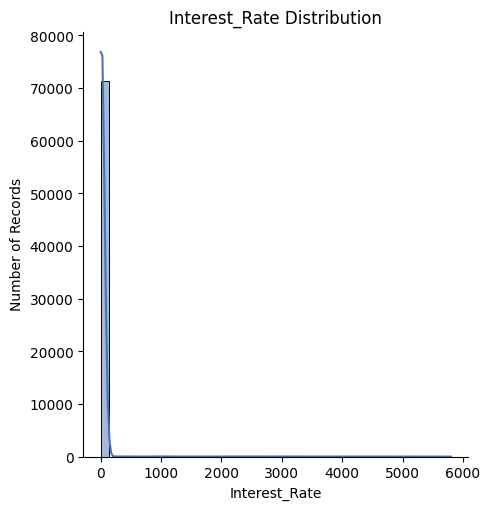

1         3
3         3
4         3
5         3
6         3
         ..
99991    29
99993     7
99997     7
99998     7
99999     7
Name: Interest_Rate, Length: 72750, dtype: int64
q25 8.0 q75 20.0
-10.0 38.0
8.0     3586
5.0     3582
6.0     3413
9.0     3271
10.0    3267
12.0    3232
7.0     3223
11.0    3068
18.0    3053
15.0    2905
20.0    2893
16.0    2778
17.0    2771
19.0    2745
1.0     1929
3.0     1915
4.0     1846
13.0    1764
2.0     1694
14.0    1643
NaN     1519
32.0    1287
30.0    1266
22.0    1264
24.0    1244
29.0    1230
28.0    1225
23.0    1211
27.0    1211
25.0    1181
21.0    1142
34.0    1132
26.0    1112
31.0    1089
33.0    1059
Name: Interest_Rate, dtype: int64
8.0     3586
5.0     3582
6.0     3413
9.0     3271
10.0    3267
12.0    3232
7.0     3223
11.0    3068
18.0    3053
15.0    2905
20.0    2893
16.0    2778
17.0    2771
19.0    2745
1.0     1929
3.0     1915
4.0     1846
13.0    1764
2.0     1694
14.0    1643
32.0    1287
30.0    1266
22.0    1264
24.

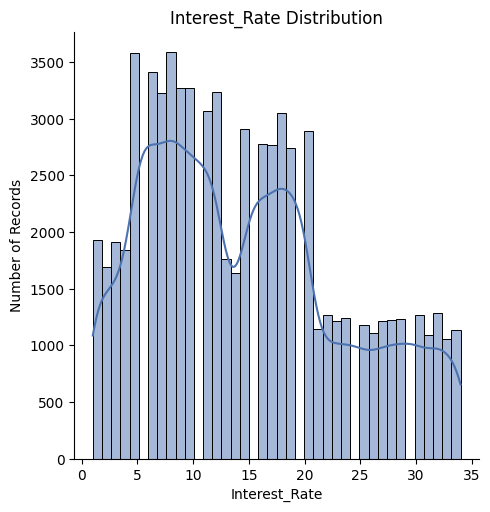

In [148]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [149]:
df_clean.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,High_spent_Medium_value_payments,340.4792117872438,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good


In [150]:
df_clean.shape

(71231, 28)

### Delay from Due Date
#### 납기일로부터의 지연은 0일에서 30일 사이에 집중되어 있습니다.

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

 15    2532
 13    2435
 8     2364
 14    2356
 9     2306
       ... 
 65      42
-4       40
-5       23
 66      21
 67      14
Name: Delay_from_due_date, Length: 73, dtype: int64

Delay_from_due_date Distribution


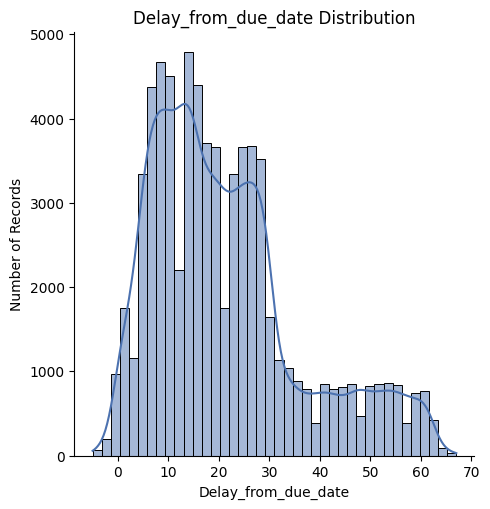

1         3
3         3
4         3
5         3
6         3
         ..
99990    33
99991    33
99993    18
99998    18
99999    18
Name: Delay_from_due_date, Length: 71231, dtype: int64
q25 10.0 q75 28.0
-17.0 55.0
 NaN     2858
 15.0    2532
 13.0    2435
 8.0     2364
 14.0    2356
         ... 
-1.0      149
-2.0      123
-3.0       78
-4.0       40
-5.0       23
Name: Delay_from_due_date, Length: 62, dtype: int64
 15.0    2532
 13.0    2435
 8.0     2364
 14.0    2356
 9.0     2306
         ... 
-1.0      149
-2.0      123
-3.0       78
-4.0       40
-5.0       23
Name: Delay_from_due_date, Length: 61, dtype: int64

Delay_from_due_date Distribution


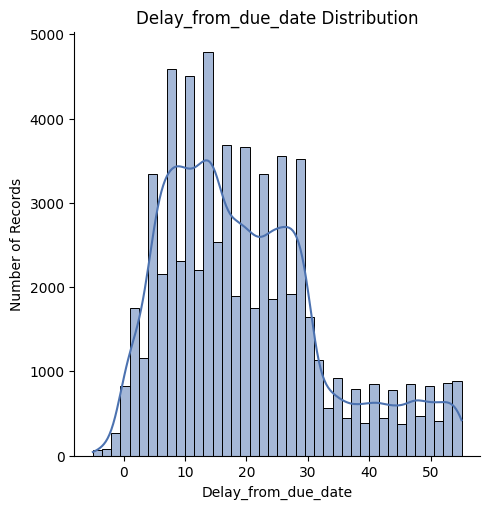

In [151]:
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [152]:
df_clean.shape

(68373, 28)

### Number of Delayed Payment

Details of Num_of_Delayed_Payment column

DataType:  object

There are  4846  null values

Number of Unique Values:  534

Distribution of column:

10      3676
17      3607
19      3598
12      3509
16      3496
        ... 
4219       1
2860       1
1608       1
3011       1
2047       1
Name: Num_of_Delayed_Payment, Length: 534, dtype: int64

_ are removed

Datatype of Num_of_Delayed_Payment is changed to float

Num_of_Delayed_Payment Distribution


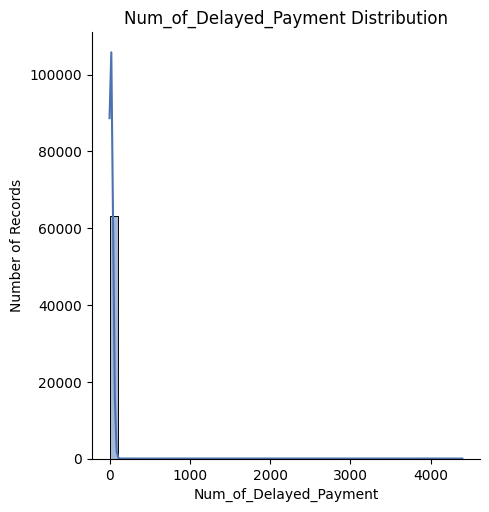

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

1         4.0
3         4.0
4         4.0
5         4.0
6         4.0
         ... 
99990    25.0
99991    25.0
99993     6.0
99998     6.0
99999     6.0
Name: Num_of_Delayed_Payment, Length: 68373, dtype: float64
q25 nan q75 nan
nan nan
NaN       4846
10.0      3785
17.0      3714
19.0      3699
12.0      3622
          ... 
4219.0       1
2860.0       1
1608.0       1
3011.0       1
2047.0       1
Name: Num_of_Delayed_Payment, Length: 501, dtype: int64
10.0      3785
17.0      3714
19.0      3699
12.0      3622
16.0      3594
          ... 
4219.0       1
2860.0       1
1608.0       1
3011.0       1
2047.0       1
Name: Num_of_Delayed_Payment, Length: 500, dtype: int64

-----------------------------------------------------

There are  422  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)

Num_of_Delayed_Payment Distribution


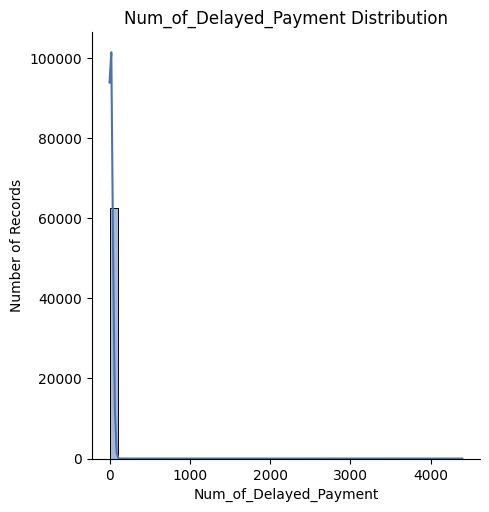

In [153]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'

# Get Details
get_column_details(df_clean,column_name)

# Cleaning
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype='float')

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

# maximum
# *** null값 처리***

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

# remove
df_clean =remove_negatives(df_clean, column_name)

# Plot Graph
plot_displot(df_clean, column_name, bins=40)

In [154]:
df_clean.shape

(63105, 28)

### Changed Credit Limit

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  4067

Distribution of column:

_                     1316
8.22                    90
11.32                   84
10.06                   80
11.49                   79
                      ... 
4.619999999999999        1
33.04                    1
31.04                    1
-0.14                    1
3.6199999999999988       1
Name: Changed_Credit_Limit, Length: 4067, dtype: int64

Garbage value _ is replaced with np.nan

_ are removed

Datatype of Changed_Credit_Limit is changed to float

Changed_Credit_Limit Distribution


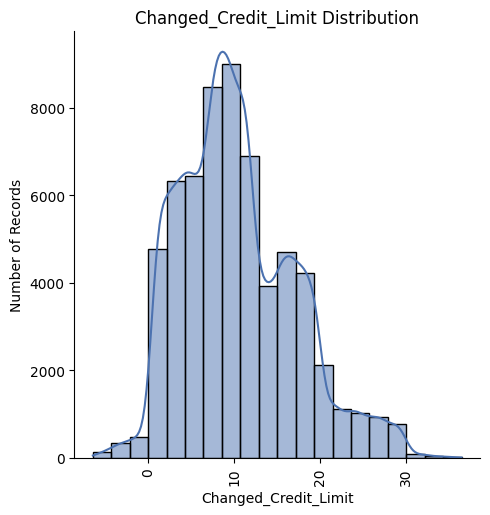

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


3        11.27
5        11.27
6        11.27
7        11.27
8         5.42
         ...  
99986    18.31
99989    18.31
99990    18.31
99991    18.31
99999    11.50
Name: Changed_Credit_Limit, Length: 63105, dtype: float64
q25 nan q75 nan
nan nan
 NaN      1316
 8.22       90
 11.32      84
 10.06      80
 11.49      79
          ... 
 4.62        1
 33.04       1
 31.04       1
-0.14        1
 3.62        1
Name: Changed_Credit_Limit, Length: 4067, dtype: int64
 8.22     90
 11.32    84
 10.06    80
 11.49    79
 9.25     77
          ..
 31.13     1
-0.15      1
-4.79      1
 25.50     1
 3.62      1
Name: Changed_Credit_Limit, Length: 4066, dtype: int64

Changed_Credit_Limit Distribution


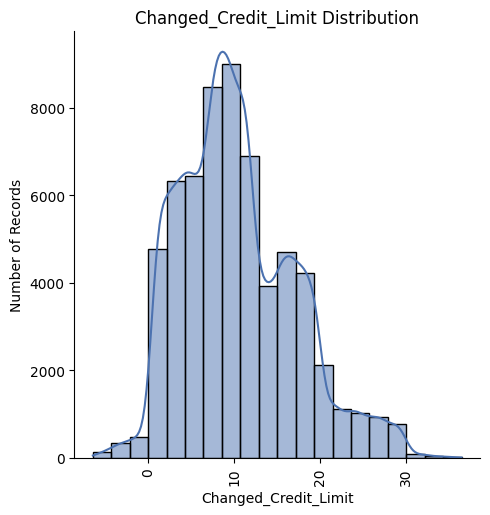

In [155]:
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

# 마이너스 냅두기

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name, strip='_', datatype='float', replace_value='_')

plot_displot(df_clean, column_name,rotation=90)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean, column_name,rotation=90)

### Number of Credit Inquiries

Details of Num_Credit_Inquiries column

DataType:  float64

There are  1194  null values

Number of Unique Values:  860

Distribution of column:

4.0       7157
3.0       5509
2.0       5095
6.0       5039
7.0       4984
          ... 
1014.0       1
699.0        1
909.0        1
1025.0       1
74.0         1
Name: Num_Credit_Inquiries, Length: 860, dtype: int64

Num_Credit_Inquiries Distribution


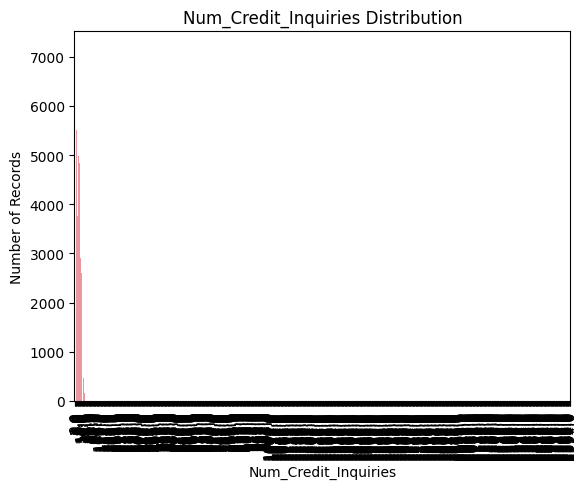


No. of missing values before filling with group median: 1194


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



No. of missing values after filling with group median: 3


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


3        4.0
5        4.0
6        4.0
7        4.0
8        2.0
        ... 
99986    9.0
99989    9.0
99990    9.0
99991    9.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 61789, dtype: float64
q25 nan q75 nan
nan nan
4.0       7305
3.0       5620
2.0       5221
6.0       5121
7.0       5075
          ... 
309.0        1
1014.0       1
699.0        1
909.0        1
74.0         1
Name: Num_Credit_Inquiries, Length: 877, dtype: int64
4.0       7305
3.0       5620
2.0       5221
6.0       5121
7.0       5075
          ... 
1535.0       1
1729.0       1
1201.0       1
727.0        1
74.0         1
Name: Num_Credit_Inquiries, Length: 876, dtype: int64

Num_Credit_Inquiries Distribution


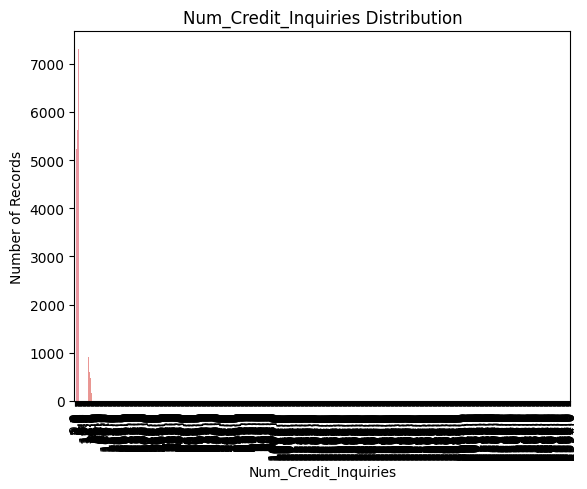

In [156]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

#Plot Graph
plot_countplot(df_clean,column_name,rotation=90)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_countplot(df_clean,column_name,rotation=90)

### Outstanding Debt

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  12215

Distribution of column:

1109.03     16
1151.7      15
1448.3      14
717.37      14
434.36      14
            ..
4607.43_     1
1090.21_     1
2444.84_     1
2537.45_     1
502.38       1
Name: Outstanding_Debt, Length: 12215, dtype: int64

_ are removed

Datatype of Outstanding_Debt is changed to <class 'float'>

Outstanding_Debt Distribution


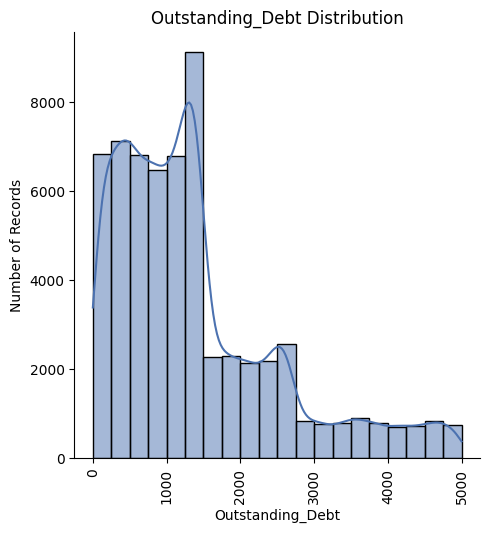

3         809.98
5         809.98
6         809.98
7         809.98
8         605.03
          ...   
99986    3571.70
99989    3571.70
99990    3571.70
99991    3571.70
99999     502.38
Name: Outstanding_Debt, Length: 61786, dtype: float64
q25 552.69 q75 1836.2
-1372.5749999999998 3761.465
NaN        3793
1109.03      17
1151.70      15
288.92       14
241.08       14
           ... 
1434.39       1
1570.42       1
1441.50       1
2673.71       1
502.38        1
Name: Outstanding_Debt, Length: 10873, dtype: int64
1109.03    17
1151.70    15
0.95       14
1154.86    14
241.08     14
           ..
3462.28     1
2239.44     1
753.00      1
629.61      1
502.38      1
Name: Outstanding_Debt, Length: 10872, dtype: int64

Outstanding_Debt Distribution


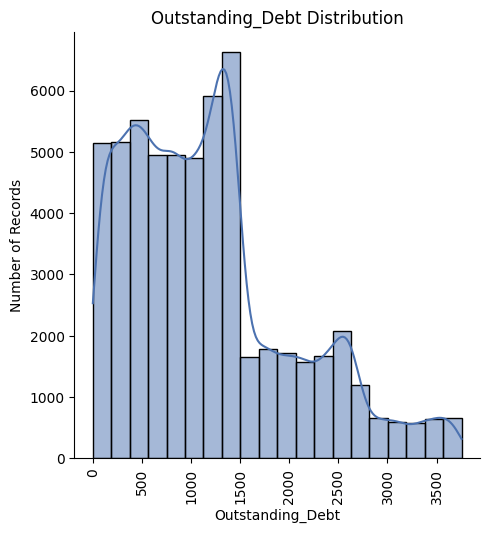

In [157]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

plot_displot(df_clean,column_name,rotation=90)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean,column_name,rotation=90)

### Credit Utilization Ratio
#### No cleaning is required

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  100000

Distribution of column:

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

Credit_Utilization_Ratio Distribution


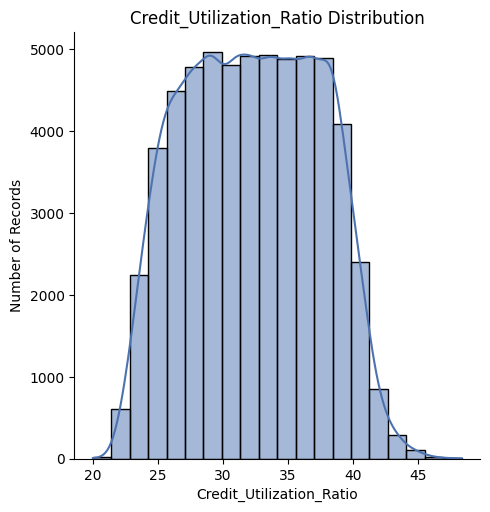

3        22.537593
5        22.537593
6        22.537593
7        22.537593
8        24.464031
           ...    
99986    22.895966
99989    22.895966
99990    22.895966
99991    22.895966
99999    34.192463
Name: Credit_Utilization_Ratio, Length: 57993, dtype: float64
q25 28.07761032091489 q75 36.4853929465942
15.465936382395919 49.09706688511317
31.377862    1
31.921162    1
37.883170    1
33.244767    1
23.181517    1
            ..
26.953999    1
26.670431    1
30.413525    1
25.145762    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 57993, dtype: int64
31.377862    1
31.921162    1
37.883170    1
33.244767    1
23.181517    1
            ..
26.953999    1
26.670431    1
30.413525    1
25.145762    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 57993, dtype: int64

Credit_Utilization_Ratio Distribution


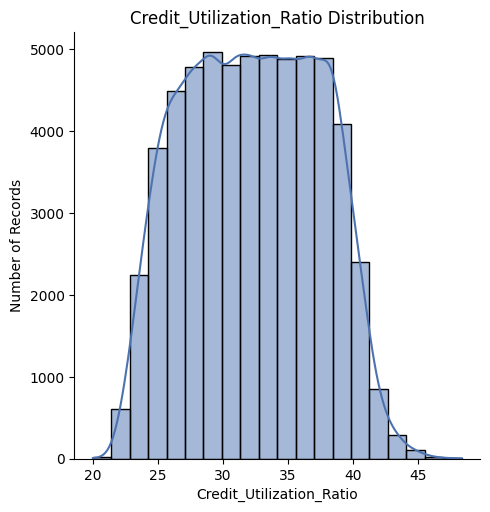

In [158]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_train,column_name)

plot_displot(df_clean,column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean,column_name)

### Credit History Age

Details of Credit_History_Age column

DataType:  object

There are  5284  null values

Number of Unique Values:  404

Distribution of column:

19 Years and 5 Months     296
17 Years and 11 Months    285
15 Years and 11 Months    283
19 Years and 4 Months     283
18 Years and 4 Months     277
                         ... 
33 Years and 7 Months       9
0 Years and 5 Months        8
0 Years and 3 Months        8
0 Years and 2 Months        4
0 Years and 1 Months        1
Name: Credit_History_Age, Length: 404, dtype: int64

Datatype of Credit_History_Age is changed to <class 'float'>

No. of missing values before filling with group median: 5284


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local


No. of missing values after filling with group median: 11


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

3        270.0
5        270.0
6        270.0
7        270.0
8        319.0
         ...  
99986     70.0
99989     70.0
99990     70.0
99991     70.0
99999    382.0
Name: Credit_History_Age, Length: 57993, dtype: float64
q25 nan q75 nan
nan nan
233.0    315
191.0    309
215.0    299
220.0    296
232.0    293
        ... 
6.5        1
66.5       1
76.5       1
75.5       1
84.5       1
Name: Credit_History_Age, Length: 756, dtype: int64
233.0    315
191.0    309
215.0    299
220.0    296
232.0    293
        ... 
27.5       1
6.5        1
66.5       1
76.5       1
84.5       1
Name: Credit_History_Age, Length: 755, dtype: int64

Credit_History_Age Distribution


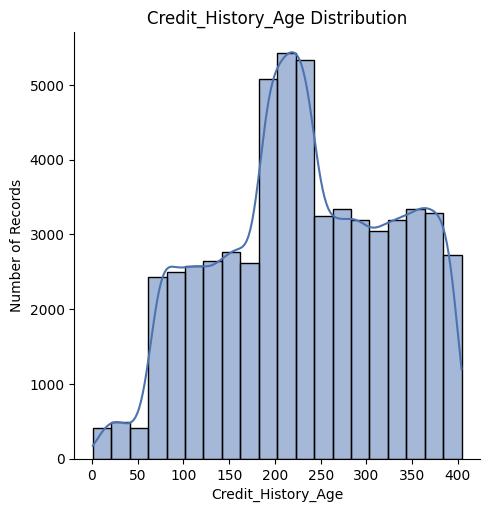

In [159]:
column_name = 'Credit_History_Age' # nan nan : lower, upper
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

df_clean = Month_Converter(df_clean, column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,datatype=float)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

#Plot Graph
plot_displot(df_clean,column_name)


### Total EMI per month

Details of Total_EMI_per_month column

DataType:  float64

There are no null values

Number of Unique Values:  12165

Distribution of column:

0.000000        6617
230.095768         8
31.606535          8
60.567361          8
10.592722          8
                ... 
49420.000000       1
66.015370          1
4363.000000        1
7650.000000        1
35.104023          1
Name: Total_EMI_per_month, Length: 12165, dtype: int64

Total_EMI_per_month Distribution


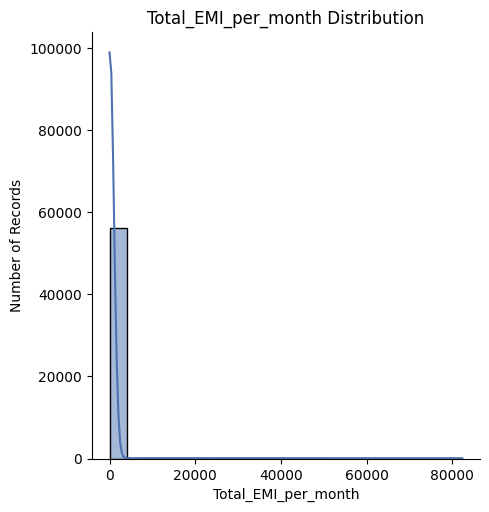

3        49.574949
5        49.574949
6        49.574949
7        49.574949
8        18.816215
           ...    
99986    60.964772
99989    60.964772
99990    60.964772
99991    60.964772
99999    35.104023
Name: Total_EMI_per_month, Length: 57982, dtype: float64
q25 27.975349073334154 q75 150.06560228296868
-155.16003074111765 333.2009820974205
0.000000      6617
NaN           4025
67.601152        8
39.594951        8
37.938021        8
              ... 
28.611776        1
112.589235       1
192.740197       1
23.546736        1
35.104023        1
Name: Total_EMI_per_month, Length: 9778, dtype: int64
0.000000      6617
176.774238       8
114.271047       8
38.170366        8
46.931619        8
              ... 
28.611776        1
112.589235       1
192.740197       1
23.546736        1
35.104023        1
Name: Total_EMI_per_month, Length: 9777, dtype: int64

Total_EMI_per_month Distribution


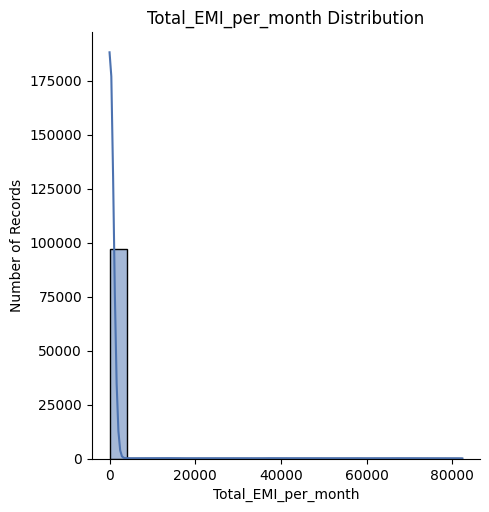

In [160]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean, column_name)

#Plot Graph
plot_displot(df_clean, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

plot_displot(df_train, column_name)

### Amount Invested Monthly

Details of Amount_invested_monthly column

DataType:  object

There are  2427  null values

Number of Unique Values:  49132

Distribution of column:

__10000__             2317
0.0                     83
86.3507008099074         1
277.5024085589978        1
483.97390407382386       1
                      ... 
210.93457653875575       1
197.3679549082345        1
222.17316841970958       1
267.04305450297403       1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 49132, dtype: int64

_ are removed

Datatype of Amount_invested_monthly is changed to <class 'float'>

Amount_invested_monthly Distribution


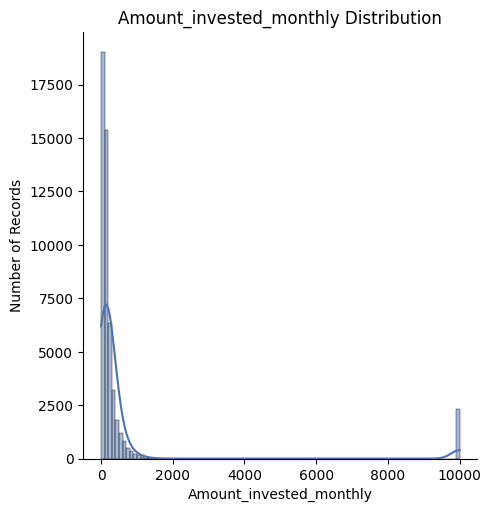


No. of missing values before filling with group median: 2427


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local


No. of missing values after filling with group median: 13


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

3         24.785217
5         24.785217
6         24.785217
7         24.785217
8         40.391238
            ...    
99986     34.662906
99989     34.662906
99990     34.662906
99991     34.662906
99999    167.163865
Name: Amount_invested_monthly, Length: 53957, dtype: float64
q25 nan q75 nan
nan nan
10000.000000    2321
0.000000          83
NaN               13
90.242835          5
148.964781         4
                ... 
65.278499          1
150.324835         1
271.746251         1
314.175932         1
167.163865         1
Name: Amount_invested_monthly, Length: 50220, dtype: int64
10000.000000    2321
0.000000          83
90.242835          5
77.514359          4
81.673546          4
                ... 
65.278499          1
150.324835         1
271.746251         1
314.175932         1
167.163865         1
Name: Amount_invested_monthly, Length: 50219, dtype: int64

Amount_invested_monthly Distribution


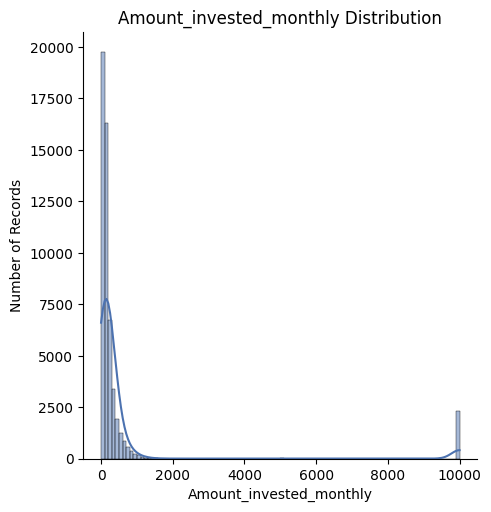

In [161]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean,column_name)

#Cleaning
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

#Plot Graph
plot_displot(df_clean, column_name, bins= 100)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

plot_displot(df_clean, column_name,bins=100)

### Monthly Balance

Details of Monthly_Balance column

DataType:  object

There are  429  null values

Number of Unique Values:  53510

Distribution of column:

__-333333333333333333333333333__    6
223.45130972736786                  1
400.0363173200229                   1
905.7412852560086                   1
653.3665125908893                   1
                                   ..
223.9824515250784                   1
332.5759235399968                   1
483.4601323537574                   1
562.165567486114                    1
393.6736955618808                   1
Name: Monthly_Balance, Length: 53510, dtype: int64

Garbage value __-333333333333333333333333333__ is replaced with np.nan

Datatype of Monthly_Balance is changed to <class 'float'>

Monthly_Balance Distribution


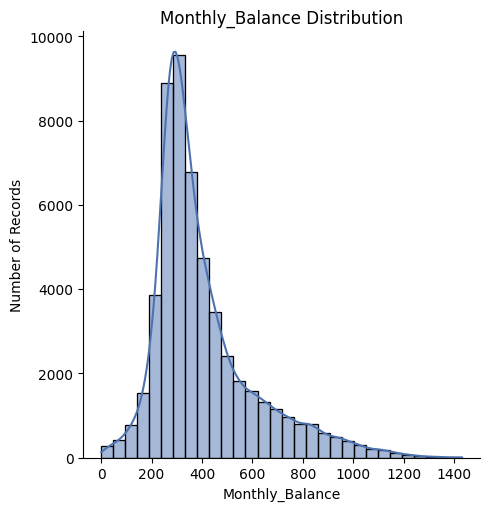


No. of missing values before filling with group median: 435


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)



No. of missing values after filling with group median: 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


3        223.451310
5        223.451310
6        223.451310
7        223.451310
8        356.078109
            ...    
99986    228.750392
99989    228.750392
99990    228.750392
99991    228.750392
99999    393.673696
Name: Monthly_Balance, Length: 53944, dtype: float64
q25 nan q75 nan
nan nan
450.860522    3
346.412269    3
318.658197    3
755.440197    3
410.607567    3
             ..
813.267716    1
391.006483    1
31.608815     1
188.141057    1
393.673696    1
Name: Monthly_Balance, Length: 53712, dtype: int64
446.879564     3
1002.809180    3
646.182006     3
337.421749     3
283.723659     3
              ..
813.267716     1
391.006483     1
31.608815      1
188.141057     1
393.673696     1
Name: Monthly_Balance, Length: 53711, dtype: int64

Monthly_Balance Distribution


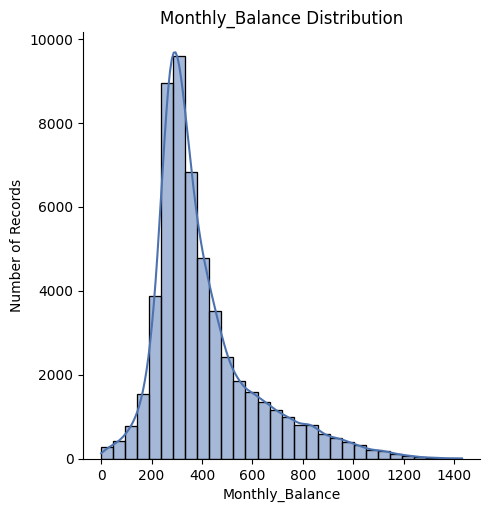

In [162]:
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean, column_name)

#Cleaning
df_clean[column_name] = df_clean[column_name].replace('',np.nan)
df_clean = clean_numerical_field(df_clean, column_name, datatype=float, replace_value = '__-333333333333333333333333333__')

#Plot Graph
plot_displot(df_clean,column_name, bins=30)

# median
df_clean = fill_missing_with_group_median(df_clean, group_by, column_name)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)

plot_displot(df_clean, column_name,bins=30)


### Number of Loan

Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  259

Distribution of column:

3       8694
2       8504
4       8019
0       6090
1       5999
        ... 
630_       1
241        1
405        1
1257       1
966        1
Name: Num_of_Loan, Length: 259, dtype: int64

_ are removed

Datatype of Num_of_Loan is changed to <class 'float'>

Num_of_Loan Distribution


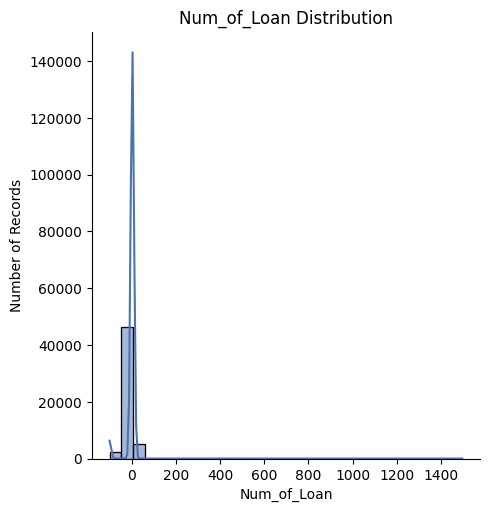

3        4.0
5        4.0
6        4.0
7        4.0
8        1.0
        ... 
99986    5.0
99989    5.0
99990    5.0
99991    5.0
99999    2.0
Name: Num_of_Loan, Length: 53943, dtype: float64
q25 1.0 q75 4.0
-3.5 8.5
3.0    9132
2.0    8977
4.0    8428
0.0    6419
1.0    6327
6.0    3654
NaN    3440
5.0    3364
7.0    3236
8.0     966
Name: Num_of_Loan, dtype: int64
3.0    9132
2.0    8977
4.0    8428
0.0    6419
1.0    6327
6.0    3654
5.0    3364
7.0    3236
8.0     966
Name: Num_of_Loan, dtype: int64

-----------------------------------------------------

There are  0  negative values(Before)

-----------------------------------------------------

There are  0  negative values(After)

Num_of_Loan Distribution


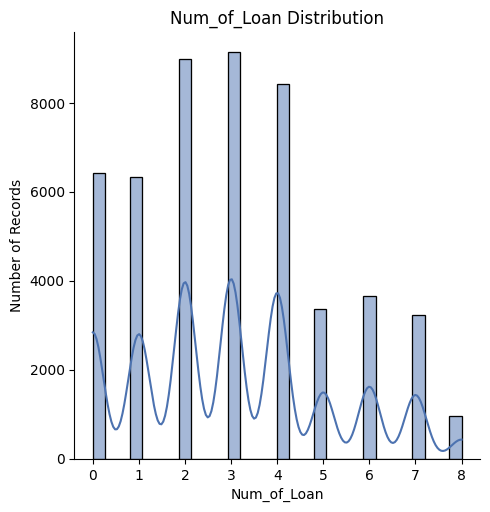

In [163]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_clean, column_name)

# clean
df_clean = clean_numerical_field(df_clean,column_name,strip='_',datatype=float)

# plot
plot_displot(df_clean,column_name,bins=30)

# iqr
df_clean = outlier_iqr_drop(df_clean, group_by, column_name)
#outlier_iqr_fill(df_clean, group_by, column_name)

# remove
df_clean = remove_negatives(df_clean, column_name)

# plot
plot_displot(df_clean,column_name,bins=30)

## 데이터 전처리 후 null 값 확인

In [ ]:
# Check if null values are present
df_clean.isnull().sum()

## Data Transformation
### 'ID','Customer_ID','Name','SSN' 제외

In [165]:
# Drop columns
print("Size of Dataset before dropping columns : ",df_clean.shape)
drop_columns = ['ID','Customer_ID','Name','SSN', 'Type_of_Loan']
df_clean.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df_clean.shape)

Size of Dataset before dropping columns :  (50503, 28)
Size of Dataset after dropping columns :  (50503, 23)


### Label Encoding
#### Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score'

In [166]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df_clean[column] = label_encoder.fit_transform(df_clean[column])

In [167]:
df_clean.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1,809.98,31.377862,268.0,0,49.574949,199.458074,5,223.451310,0
5,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,...,1,809.98,27.262259,270.0,0,49.574949,62.430172,1,340.479212,0
6,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,22.537593,271.0,0,49.574949,178.344067,5,244.565317,0
7,8,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,23.933795,270.0,0,49.574949,24.785217,1,358.124168,2
8,1,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,24.464031,319.0,0,18.816215,104.291825,5,470.690627,2


### drop2

In [168]:
df_clean.to_csv('C:\\Users\\User\\Desktop\\프로젝트1(신용평가)\\Data\\train_outlier_drop2.csv')

## 데이터 분할

In [98]:
#Spli Input & Output Data
X = df_clean.drop('Credit_Score',axis=1)
y = df_clean['Credit_Score']
print(X.shape)
print(y.shape)

(50503, 27)
(50503,)


In [99]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


#standard = StandardScaler()
#standard.fit(train_X)
#train_X_scale = standard.transform(train_X)

ValueError: ignored

# model building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

## 1

In [ ]:
# Split Data 8:2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40402, 22)
(10101, 22)
(40402,)
(10101,)


### Pycaret

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 88.0 MB/s eta 0:0

In [ ]:
from pycaret.classification import *

In [ ]:
#Spli Input & Output Data
X = df_clean.drop('Credit_Score',axis=1)
y = df_clean['Credit_Score']
print(X.shape)
print(y.shape)

(50503, 22)
(50503,)


In [ ]:
X

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,4.0,1,809.98,31.377862,268.0,0,49.574949,199.458074,5,223.451310
5,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,...,4.0,1,809.98,27.262259,270.0,0,49.574949,62.430172,1,340.479212
6,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,1,809.98,22.537593,271.0,0,49.574949,178.344067,5,244.565317
7,8,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,4.0,1,809.98,23.933795,270.0,0,49.574949,24.785217,1,358.124168
8,1,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,2.0,1,605.03,24.464031,319.0,0,18.816215,104.291825,5,470.690627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,3,28.0,1,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,...,9.0,0,3571.70,24.713861,70.0,1,60.964772,76.282793,5,345.743101
99989,6,28.0,1,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,...,9.0,0,3571.70,33.359987,73.0,1,60.964772,74.366603,0,307.659291
99990,7,28.0,1,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,...,9.0,0,3571.70,25.123535,70.0,1,60.964772,173.275503,3,228.750392
99991,8,29.0,1,20002.88,1929.906667,10.0,8.0,29.0,5.0,33.0,...,9.0,0,3571.70,37.140784,75.0,1,60.964772,34.662906,0,337.362988


In [ ]:
# 모델 생성
model = setup(df_clean, target = 'Credit_Score', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Credit_Score
2,Target type,Multiclass
3,Original data shape,"(50503, 23)"
4,Transformed data shape,"(50503, 23)"
5,Transformed train set shape,"(35352, 23)"
6,Transformed test set shape,"(15151, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models(round = 4, sort = 'Accuracy', n_select = 1, verbose = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7996,0.9041,0.7996,0.7993,0.7993,0.6591,0.6593,6.2780
rf,Random Forest Classifier,0.7922,0.9011,0.7922,0.7924,0.7922,0.6482,0.6483,11.1320
xgboost,Extreme Gradient Boosting,0.7621,0.8849,0.7621,0.7625,0.7620,0.5961,0.5963,23.4380
lightgbm,Light Gradient Boosting Machine,0.7501,0.8778,0.7501,0.7531,0.7508,0.5790,0.5794,2.1300
gbc,Gradient Boosting Classifier,0.7279,0.8576,0.7279,0.7344,0.7295,0.5441,0.5451,40.9860
dt,Decision Tree Classifier,0.6936,0.7352,0.6936,0.6937,0.6936,0.4816,0.4816,1.0630
qda,Quadratic Discriminant Analysis,0.6770,0.8009,0.6770,0.7152,0.6832,0.4884,0.5000,0.1420
ada,Ada Boost Classifier,0.6712,0.7311,0.6712,0.6751,0.6696,0.4353,0.4374,3.0770
lda,Linear Discriminant Analysis,0.6645,0.7931,0.6645,0.6671,0.6605,0.4178,0.4213,0.4440
knn,K Neighbors Classifier,0.6502,0.7777,0.6502,0.6484,0.6492,0.4041,0.4042,1.7230


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

## 2 - pycaret 돌려보고 베스트 모델

### 불균형 데이터 처리

In [ ]:
# Handle Imbalance Data
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    27950
2    27950
1    27950
Name: Credit_Score, dtype: int64

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67080, 22)
(16770, 22)
(67080,)
(16770,)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
# Train the classifier
extra_trees_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = extra_trees_model.predict(X_test)

# Accuaracy
evaluate_model(y_test, y_pred)
print(np.mean(y_test == y_pred))

0.8762671437090042


In [ ]:
# Training the classifier
best_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluating the model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### 베스트 모델 변수중요도 확인

Text(0.5, 1.0, 'Top feature importance')

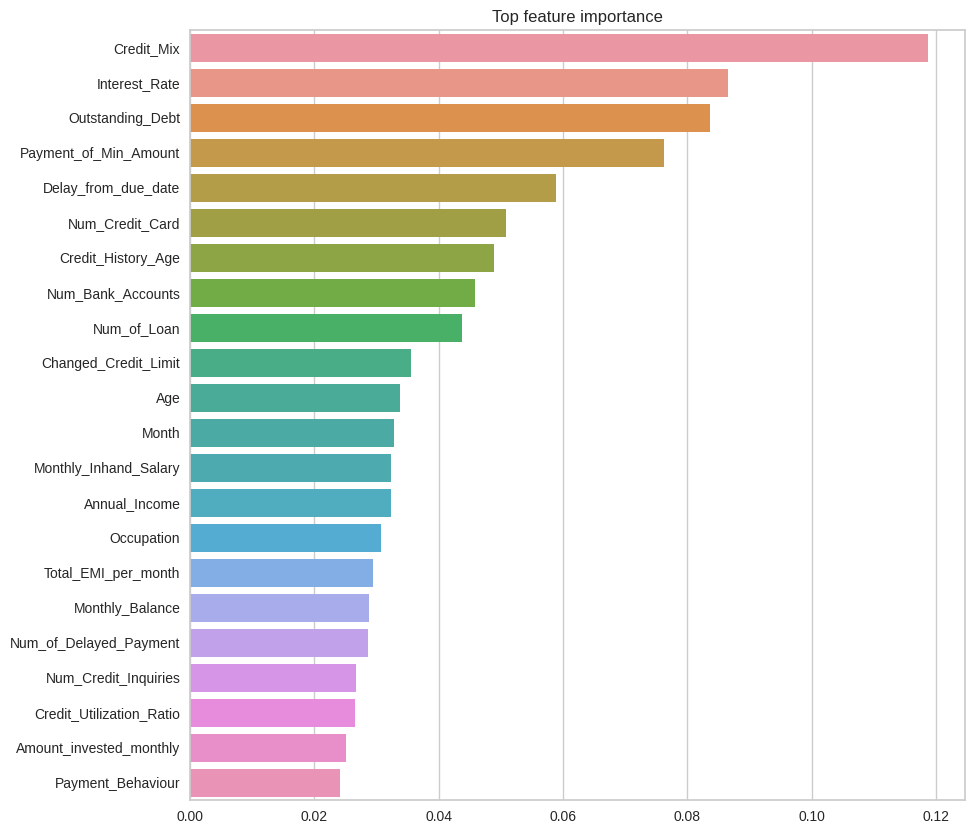

In [ ]:
# 변수 중요도
f_imp_v = best_model.feature_importances_
f_imp_v = pd.Series(f_imp_v, index = X.columns)
f_imp_v.sort_values(ascending=False)

# 시각화
f_top = f_imp_v.sort_values(ascending=False)
plt.figure(figsize = (10, 10))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')